# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

    Explore the dataset and extract insights using Exploratory Data Analysis.
    Do the users spend more time on the new landing page than the old landing page?
    Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
    Is the mean time spent on the new page same for the different language users?


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv

df = pd.read_csv('abtest.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape

(100, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 100 unique users.
There are 2 unique groups - control and treatment. Each group consists of 50 users.
There are 2 landing_pages - new and old.
Overall, 54 users get converted and 46 users do not get converted after visiting the landing page.
There are 3 unique preferred languages - English, French, and Spanish

### Univariate Analysis

In [6]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [7]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

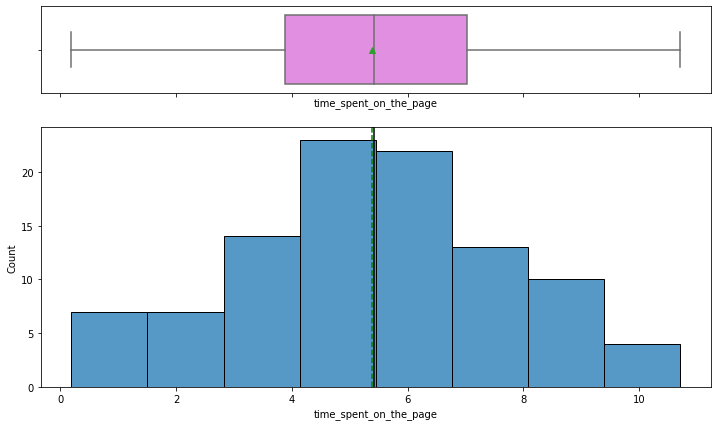

In [8]:
histogram_boxplot(df,"time_spent_on_the_page")

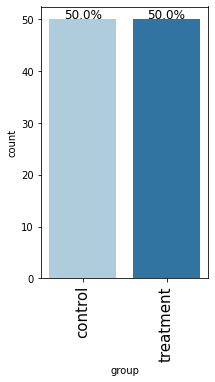

In [9]:
labeled_barplot(df,'group',perc = True)

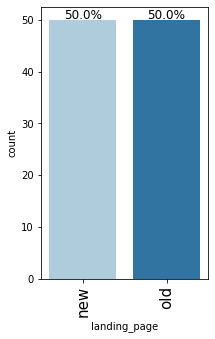

In [10]:
labeled_barplot(df,'landing_page',perc = True)

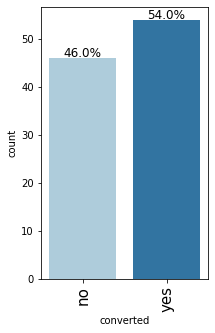

In [11]:
labeled_barplot(df,'converted',perc = True)

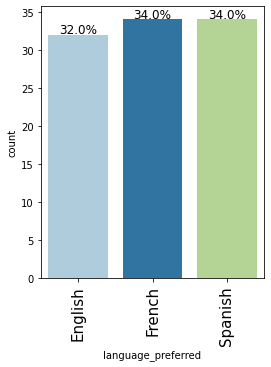

In [12]:
labeled_barplot(df,'language_preferred',perc = True)

### Bivariate Analysis

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

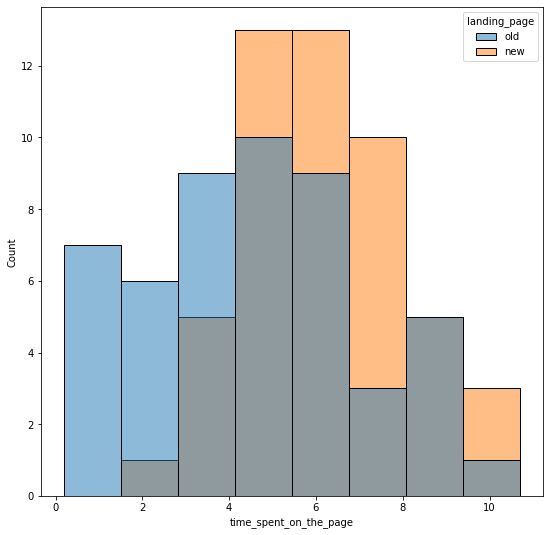

In [13]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

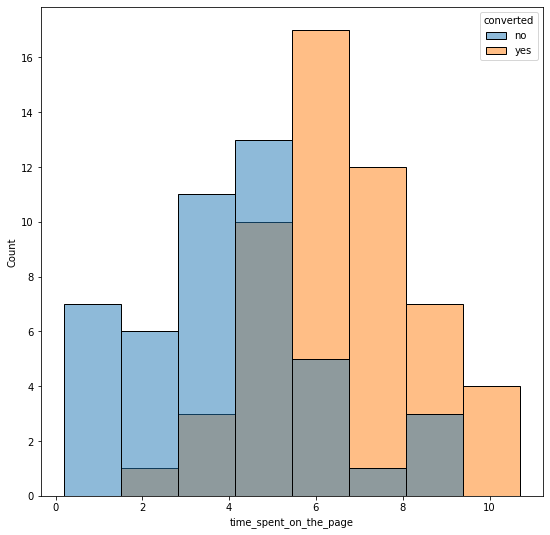

In [14]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

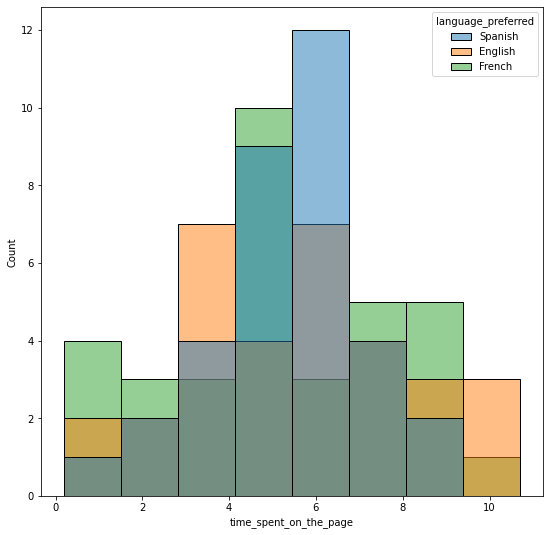

In [15]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'language_preferred')
plt.show()

### Step 1: Define the null and alternate hypotheses

null hypotheses:
users do not spend more time on the new landing page than the existing landing page

alternate hypotheses:
the users spend more time on the new landing page than the existing landing page

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown.2-sample ind.t-test

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05

### Step 4: Collect and prepare data

In [16]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [17]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

In [22]:
# complete the code to import the required function
from scipy.stats import ttest_ind 

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old)

print('The p-value is', p_value)

The p-value is 0.000263224705619001


### Step 6: Compare the p-value with $\alpha$

In [23]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.000263224705619001 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

the users spend more time on the new landing page than the existing landing page

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

Null hypotheses:
Conversion rate for the new page is not greater than the old page

Alternate hypotheses:
Conversion rate for the new page is greater than the conversion rate of old page
    

Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, two proportion z test

As given in the problem statement, we select α = 0.05.


In [25]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'treatment']['converted'].value_counts()['no']

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [28]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest 

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_control, n_treatment], alternative = 'two-sided')

print('The p-value is', p_value)

The p-value is 0.0013742758758316966


In [29]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0013742758758316966 is less than the level of significance, we reject the null hypothesis.


Conversion rate for the new page is greater than the conversion rate of old page

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

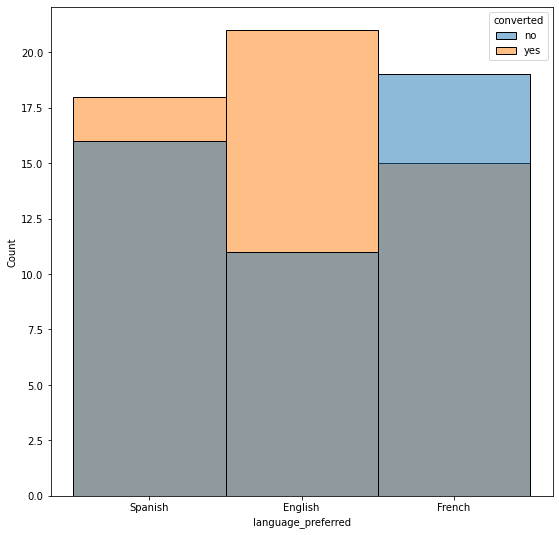

In [31]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'language_preferred', hue = 'converted')
plt.show()

Null hypotheses:
language and conversion are independent

Alternate hypotheses:
language and conversion are not independent

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Based on this Chi-square test is appropriate

As given in the problem statement, we select α = 0.05.

In [33]:
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])


In [34]:
# complete the code to import the required function
from scipy.stats import chi2_contingency  

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.2129888748754345


In [35]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


language and conversion are independent

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

In [36]:
df_new = df[df['landing_page'] == 'new']

This is a problem, concerning three population means. Based on this information, select the appropriate test to compare the three population means. Also, check the assumptions of normality and equality of variance for the three groups

    For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

    For equality of variance, Levene test is applied to the response variable.



We will test the null hypothesis

Time spent on the new page follows a normal distribution

In [37]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.


Levene’s test

We will test the null hypothesis

: All the population variances are equal

In [38]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [44]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


As given in the problem statement, we select α = 0.05.


In [39]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

In [45]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, stats.f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [46]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


All the population variances are equal

## Conclusion and Business Recommendations

the users spend more time on the new landing page than the existing landing page
Conversion rate for the new page is greater than the conversion rate of old page
language and conversion are independent
Time spent on the new page follows a normal distribution
All the population variances are equal